In [1]:
# Imports
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
# Load the data
data = pd.read_excel(r'C:\Users\Kavya\OneDrive\Documents\DSA_internship\influencer_data.xlsx')

In [3]:
data.head(10)

,channelId,title,description,publishedAt,subscriberCount,viewCount,videoCount,accountAgeDays,avgLikes,avgComments,EngagementRate,PostFrequency,query
0,UCR6H7VWfgscnYHpRAMLWbKA,Farming Tech Mayur Patel,@FarmingTechMayurPatel \n#FarmingTech\n➡️खेतीब...,2017-01-01T10:14:18Z,429000,35881172,343,3218.0,252,21,0.0006,0.106588,tech influencer
1,UCeoRAN5sr02w8_9aFWxIM4g,Tech Travel Eat by Sujith Bhakthan,"Traveler, Influencer & Food Lover\nContact: ad...",2016-08-01T16:13:49Z,2300000,803219530,2454,3371.0,2695,245,0.0013,0.727974,tech influencer
2,UCMiJRAwDNSNzuYeN2uWa0pA,Mrwhosetheboss,Let's become the Greatest Tech Community on th...,2011-04-20T12:10:24Z,21800000,7830277165,1852,5301.0,61953,1802,0.0029,0.349368,tech influencer
3,UCJ7c1q_0KXilw_jgkeLG8pg,Techbrokannada,"Technology, Smartphone Reviews , Unboxing Gadg...",2019-04-05T13:35:11Z,117000,12541442,1553,2394.0,663,27,0.0059,0.648705,tech influencer
4,UC9XWJ3iy4FO6_hQbgGFPcfg,Mau Lozano Tech,"Smartphones, Unboxings, AI, Gadgets \n📍Califor...",2021-10-08T06:36:08.402086Z,555000,237325858,1312,1480.0,1340,21,0.0025,0.886486,tech influencer
5,UCXUJJNoP1QupwsYIWFXmsZg,Tech Burner,Subscribe 🔥,2014-09-26T18:24:03Z,12500000,2421879962,1525,4049.0,61960,1283,0.0051,0.376636,tech influencer
6,UCBW8ENk_9sp13G42hNly_sg,Tech Influence,"I’m Andy, a Tech Influencer #ShareASale",2011-09-30T22:44:36Z,16500,11208705,3202,5141.0,159,24,0.0111,0.622836,tech influencer
7,UCV0qA-eDDICsRR9rPcnG7tw,Joma Tech,I talk about life in Silicon Valley and at big...,2016-08-31T22:22:07Z,2350000,193362459,89,3344.0,94881,2577,0.0415,0.026615,tech influencer
8,UCggXQcy57bwxUeZI1LB8DCw,Tech Is The New Black,We are the #1 tech business and tech career vi...,2010-03-09T19:56:56Z,160000,11904664,1402,5711.0,10,0,0.0001,0.245491,tech influencer
9,UCS261lQDXjMvc8Jck-2CQEg,Gyan Therapy,We present tech products in simple & easy-to-u...,2018-08-05T18:58:33Z,3960000,1292642688,1568,2640.0,102778,2049,0.0265,0.593939,tech influencer


In [4]:
data.shape

(4566, 13)

In [5]:
data.columns.tolist()

['channelId',
 'title',
 'description',
 'publishedAt',
 'subscriberCount',
 'viewCount',
 'videoCount',
 'accountAgeDays',
 'avgLikes',
 'avgComments',
 'EngagementRate',
 'PostFrequency',
 'query']

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4566 entries, 0 to 4565
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   channelId        4566 non-null   object 
 1   title            4566 non-null   object 
 2   description      4497 non-null   object 
 3   publishedAt      4566 non-null   object 
 4   subscriberCount  4566 non-null   int64  
 5   viewCount        4566 non-null   int64  
 6   videoCount       4566 non-null   int64  
 7   accountAgeDays   4566 non-null   float64
 8   avgLikes         4566 non-null   int64  
 9   avgComments      4566 non-null   int64  
 10  EngagementRate   4566 non-null   float64
 11  PostFrequency    4564 non-null   float64
 12  query            4566 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 463.9+ KB


In [7]:
data.describe()

,subscriberCount,viewCount,videoCount,accountAgeDays,avgLikes,avgComments,EngagementRate,PostFrequency
count,4.566000e+03,4.566000e+03,4566.000000,4566.000000,4.566000e+03,4566.000000,4566.000000,4564.000000
mean,2.117218e+06,6.604313e+08,824.441743,3161.859199,1.593438e+04,699.141700,0.017485,0.743716
std,1.260336e+07,3.252216e+09,2123.534421,1637.928471,9.500104e+04,6235.446836,0.200637,27.974634
min,5.000000e+03,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2.100000e+04,2.825804e+06,184.000000,1906.000000,3.200000e+01,2.000000,0.000700,0.069795
50%,1.600000e+05,2.641302e+07,431.000000,3115.000000,4.035000e+02,23.000000,0.003000,0.159801
75%,1.140000e+06,2.368313e+08,930.250000,4390.000000,3.593250e+03,160.750000,0.010600,0.348966
max,4.480000e+08,9.885257e+10,61366.000000,7307.000000,2.102047e+06,202771.000000,8.928600,1889.411765


In [8]:
# Checking for null values
data.isnull().sum()

channelId           0
title               0
description        69
publishedAt         0
subscriberCount     0
viewCount           0
videoCount          0
accountAgeDays      0
avgLikes            0
avgComments         0
EngagementRate      0
PostFrequency       2
query               0
dtype: int64

In [9]:
# Removing null values, duplicates, unecessary features
data = data.drop_duplicates()
data = data.dropna()
data = data.drop(['channelId', 'description', 'publishedAt'], axis=1)

In [10]:
data.head(5)

,title,subscriberCount,viewCount,videoCount,accountAgeDays,avgLikes,avgComments,EngagementRate,PostFrequency,query
0,Farming Tech Mayur Patel,429000,35881172,343,3218.0,252,21,0.0006,0.106588,tech influencer
1,Tech Travel Eat by Sujith Bhakthan,2300000,803219530,2454,3371.0,2695,245,0.0013,0.727974,tech influencer
2,Mrwhosetheboss,21800000,7830277165,1852,5301.0,61953,1802,0.0029,0.349368,tech influencer
3,Techbrokannada,117000,12541442,1553,2394.0,663,27,0.0059,0.648705,tech influencer
4,Mau Lozano Tech,555000,237325858,1312,1480.0,1340,21,0.0025,0.886486,tech influencer


In [11]:
data.shape

(3398, 10)

In [12]:
data.isnull().sum()

title              0
subscriberCount    0
viewCount          0
videoCount         0
accountAgeDays     0
avgLikes           0
avgComments        0
EngagementRate     0
PostFrequency      0
query              0
dtype: int64

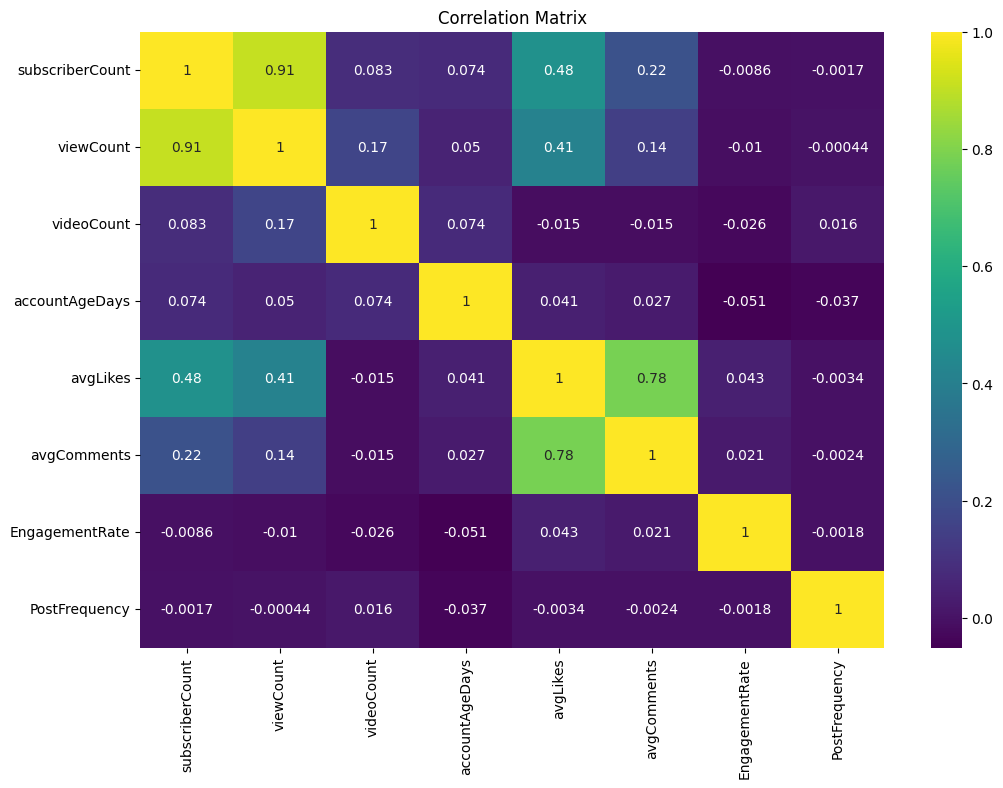

In [13]:
# Correlation heat map
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="viridis")
plt.title("Correlation Matrix")
plt.show()

In [14]:

num_data = data.select_dtypes(include = "number")
cat_data = data.select_dtypes(include = "object")

# Identify categorical and numerical columns
num_cols = num_data.columns.tolist()
cat_cols = cat_data.columns.tolist()

print("numerical columns: ", num_cols)
print("categorical columns: ",cat_cols)

numerical columns:  ['subscriberCount', 'viewCount', 'videoCount', 'accountAgeDays', 'avgLikes', 'avgComments', 'EngagementRate', 'PostFrequency']
categorical columns:  ['title', 'query']


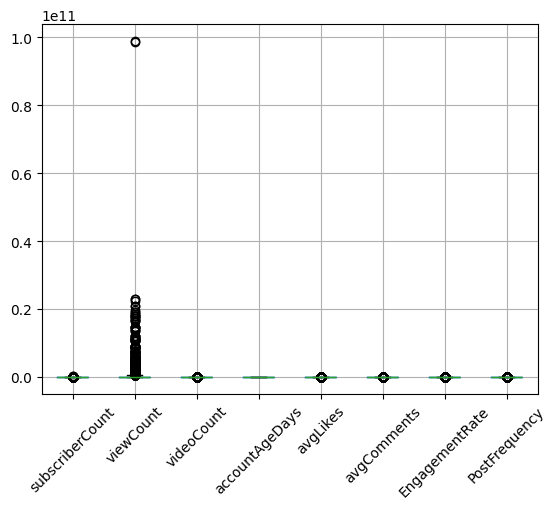

In [15]:
# Perform an outlier detection analysis on numerical variables (e.g., using the IQR method).
num_data.boxplot()
plt.xticks(rotation=45)
plt.show()

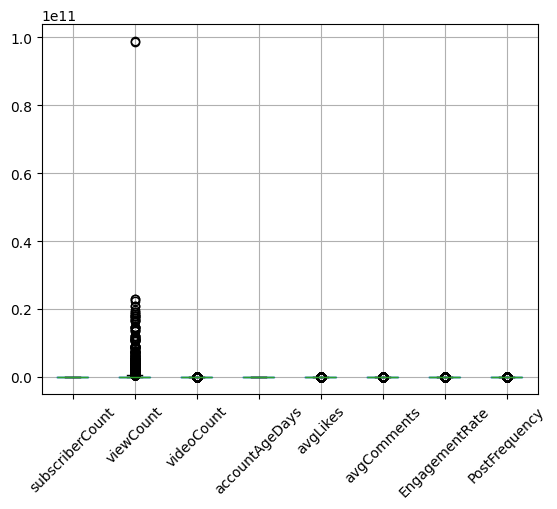

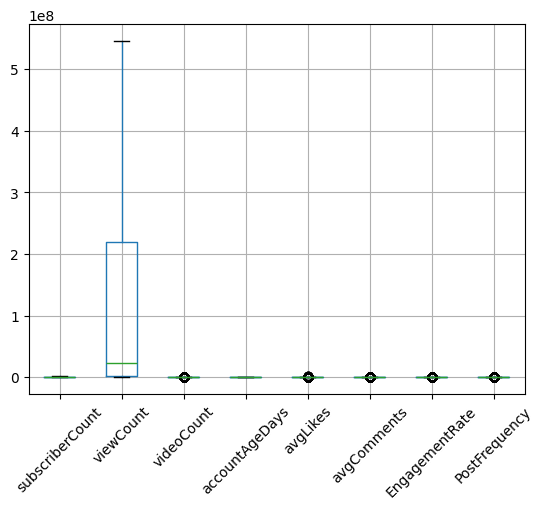

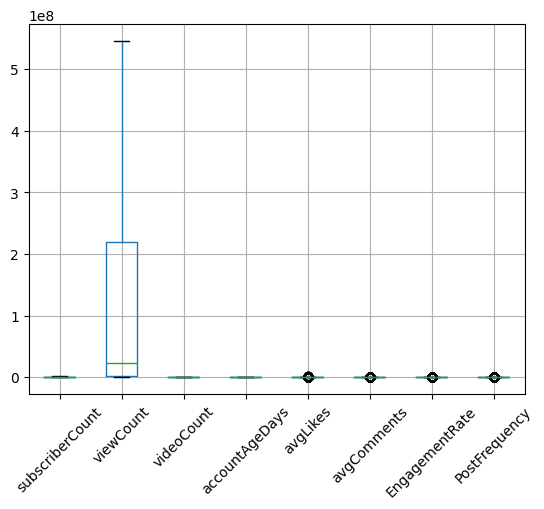

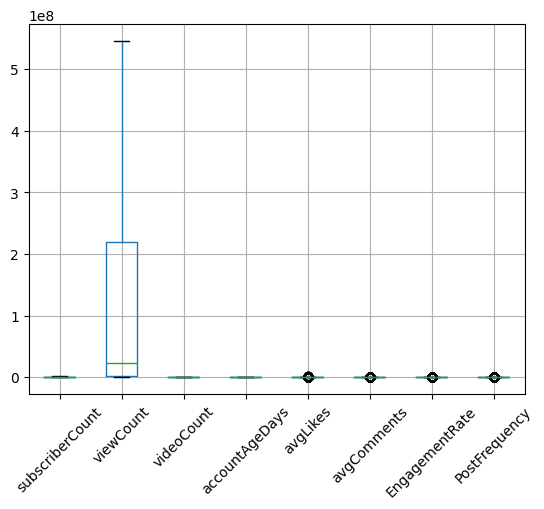

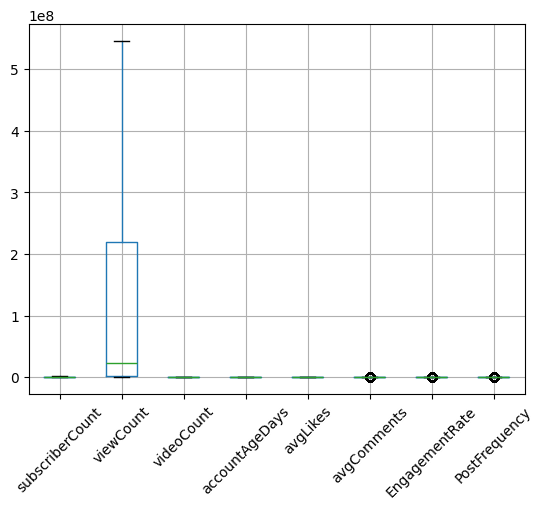

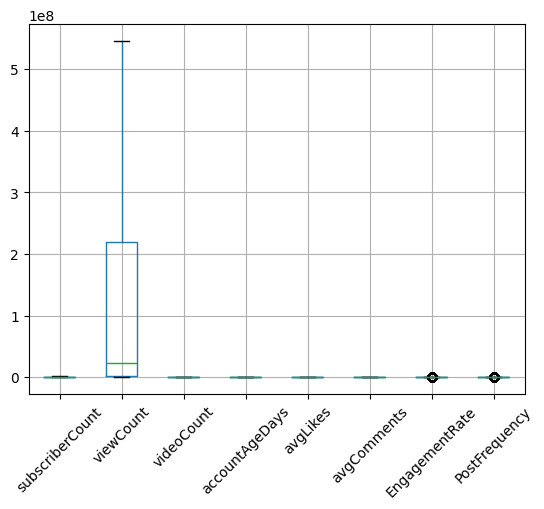

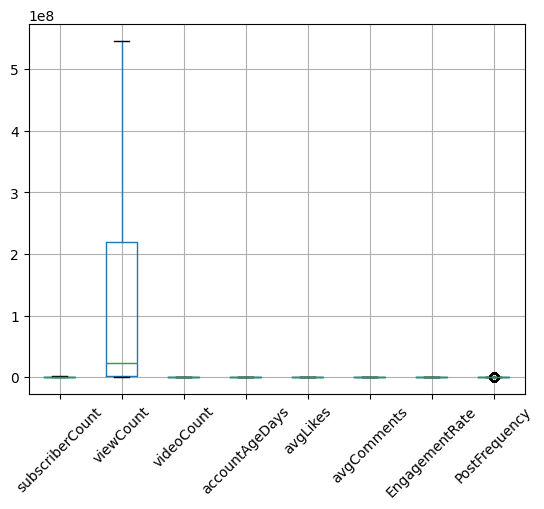

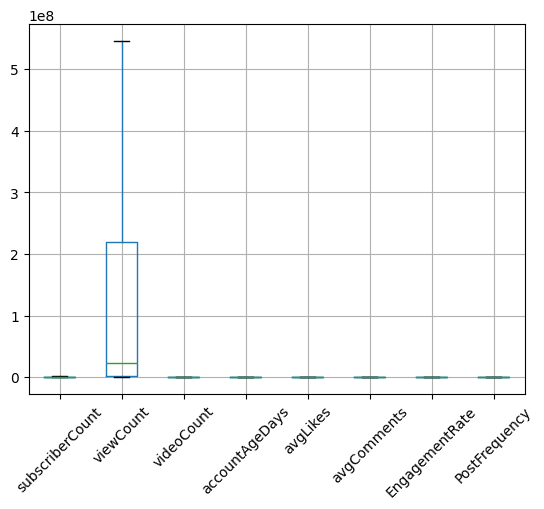

In [16]:
# Remove outliers from these features if they are not representative of typical house prices.

def remove_outliers(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    data[column_name] = data[column_name].clip(upper = upper_bound)
    data[column_name] = data[column_name].clip(lower = lower_bound)
    return data[column_name]




for col in num_cols:
      num_data[col] = remove_outliers(num_data, col)
      num_data.boxplot()
      plt.xticks(rotation=45)
      plt.show()

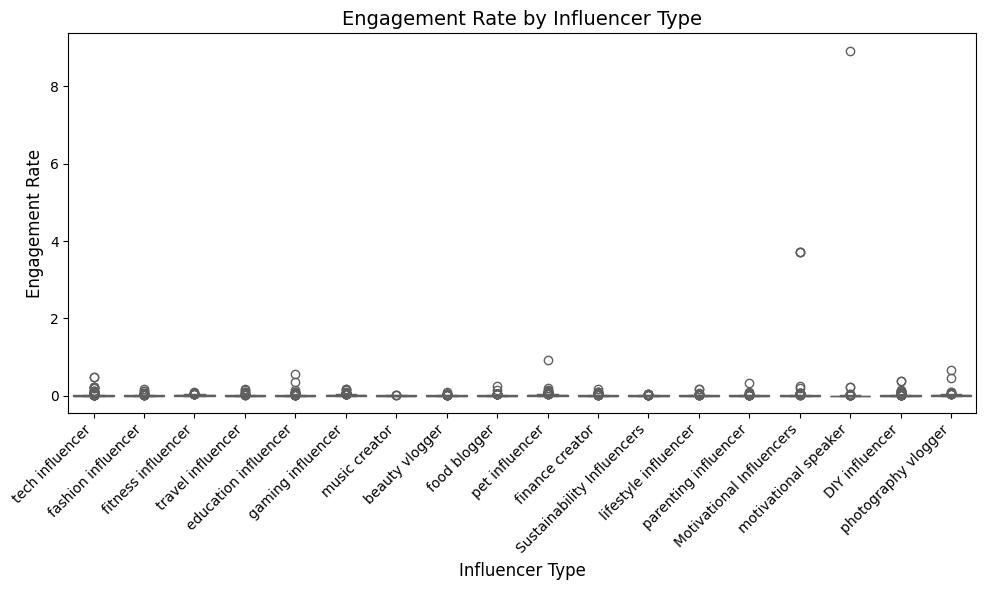

In [17]:
# Distribution of Engagement Rate across different influencer types
plt.figure(figsize=(10,6))
sns.boxplot(
    x='query', 
    y='EngagementRate', 
    hue='query', 
    data=data, 
    palette='Set3', 
    legend=False
)

plt.title('Engagement Rate by Influencer Type', fontsize=14)
plt.xlabel('Influencer Type', fontsize=12)
plt.ylabel('Engagement Rate', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

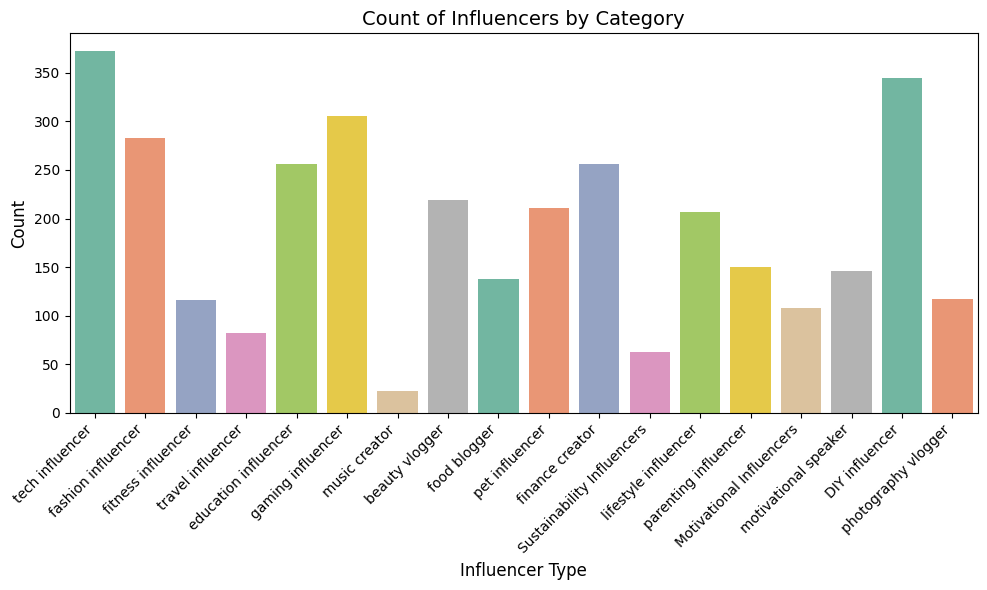

In [18]:
# Distribution of influencer counts across different categories
plt.figure(figsize=(10,6))
sns.countplot(x='query', hue='query', data=data, palette='Set2', legend=False)

plt.title('Count of Influencers by Category', fontsize=14)
plt.xlabel('Influencer Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# 🔄 Rotate x-axis labels for clarity
plt.xticks(rotation=45, ha='right')  # or rotation=60 for steeper angle

plt.tight_layout()
plt.show()

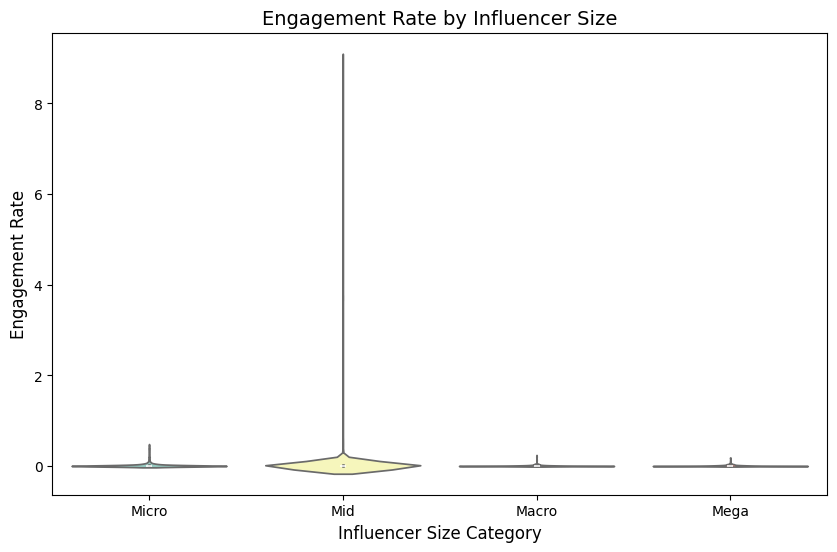

In [19]:
# Engagement Rate distribution across influencer size categories.
subgroup = pd.cut(
    data['subscriberCount'],
    bins=[0, 10000, 100000, 1000000, 10000000],
    labels=['Micro', 'Mid', 'Macro', 'Mega']
)

plt.figure(figsize=(10,6))
sns.violinplot(
    x=subgroup,          # use the temporary variable
    y=data['EngagementRate'],
    palette='Set3',
    hue=subgroup,
    legend=False
)

plt.title('Engagement Rate by Influencer Size', fontsize=14)
plt.xlabel('Influencer Size Category', fontsize=12)
plt.ylabel('Engagement Rate', fontsize=12)
plt.show()


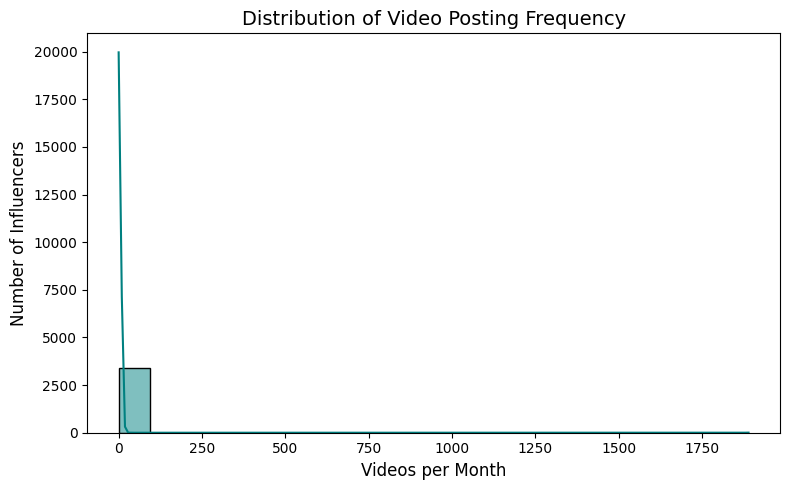

In [20]:
# Distribution of influencers’ video posting frequency
plt.figure(figsize=(8,5))
sns.histplot(data['PostFrequency'], bins=20, kde=True, color='teal')

plt.title('Distribution of Video Posting Frequency', fontsize=14)
plt.xlabel('Videos per Month', fontsize=12)
plt.ylabel('Number of Influencers', fontsize=12)
plt.tight_layout()
plt.show()


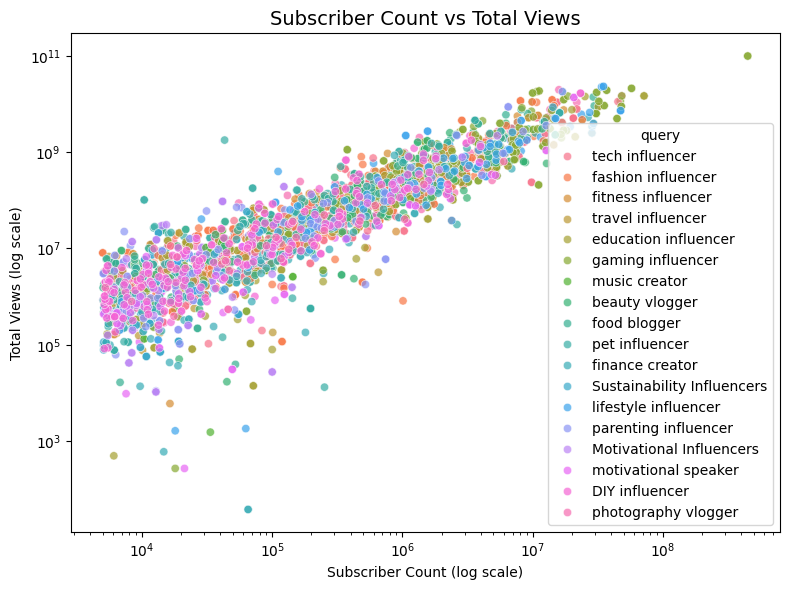

In [21]:
# Relationship between subscriber count and total views across different influencer categories.
plt.figure(figsize=(8,6))
sns.scatterplot(x='subscriberCount', y='viewCount', hue='query', data=data, alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.title('Subscriber Count vs Total Views', fontsize=14)
plt.xlabel('Subscriber Count (log scale)')
plt.ylabel('Total Views (log scale)')
plt.tight_layout()
plt.show()


In [22]:
# Scaling
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

In [23]:
# Encoding
cat_cols = ['query']  
data = pd.get_dummies(data, columns=cat_cols, drop_first=True)

In [24]:
scaler = MinMaxScaler()

data[['subscriberCount_scaled', 'viewCount_scaled', 'avgLikes_scaled', 'avgComments_scaled']] = scaler.fit_transform(
    data[['subscriberCount', 'viewCount', 'avgLikes', 'avgComments']]
)

# Compute weighted popularity score
data['popularity_score'] = (
    0.4 * data['subscriberCount_scaled'] +
    0.3 * data['viewCount_scaled'] +
    0.2 * data['avgLikes_scaled'] +
    0.1 * data['avgComments_scaled']
) * 10

# Scale to 1–10 range
min_val = data['popularity_score'].min()
max_val = data['popularity_score'].max()
data['popularity_score'] = 1 + 9 * (data['popularity_score'] - min_val) / (max_val - min_val)

print("✅ Popularity scores (1–10) added successfully!")
print(data['popularity_score'].describe())

✅ Popularity scores (1–10) added successfully!
count    3398.000000
mean        1.054495
std         0.260076
min         1.000000
25%         1.000427
50%         1.003234
75%         1.025212
max        10.000000
Name: popularity_score, dtype: float64


In [25]:
features = ['videoCount', 'PostFrequency', 'accountAgeDays', 'EngagementRate']
X = data[features]
y = data['popularity_score']


In [26]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [27]:
# 4️⃣ Define models
# --------------------------
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.001),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, random_state=42),
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)



    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    results.append({
        "Model": name,
        "R²": round(r2, 4),
        "RMSE": round(rmse, 2),
        "MAE": round(mae, 2)
    })

results_df = pd.DataFrame(results)
print("\n📈 Model Comparison Results:")
print(results_df.sort_values("R²", ascending=False))


📈 Model Comparison Results:
               Model      R²  RMSE   MAE
4  Gradient Boosting  0.4689  0.14  0.06
3      Random Forest  0.3802  0.15  0.06
2   Lasso Regression  0.0127  0.19  0.07
1   Ridge Regression  0.0119  0.19  0.07
0  Linear Regression  0.0118  0.19  0.07


In [28]:
# --- Step 1: Define base model ---
gbr = GradientBoostingRegressor(random_state=42)

# --- Step 2: Define parameter grid ---
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'subsample': [0.8, 1.0]
}

# --- Step 3: Define CV setup ---
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# --- Step 4: Run GridSearchCV (with built-in CV) ---
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    scoring='r2',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

# --- Step 5: Best parameters & CV score ---
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validation R²: {grid_search.best_score_:.4f}")

# --- Step 6: Evaluate on test data ---
best_gbr = grid_search.best_estimator_
y_pred = best_gbr.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("\n📊 Final Model Performance on Test Set")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300, 'subsample': 1.0}
Best Cross-Validation R²: 0.2794

📊 Final Model Performance on Test Set
R² Score: 0.5736
RMSE: 0.1264
MAE: 0.0502


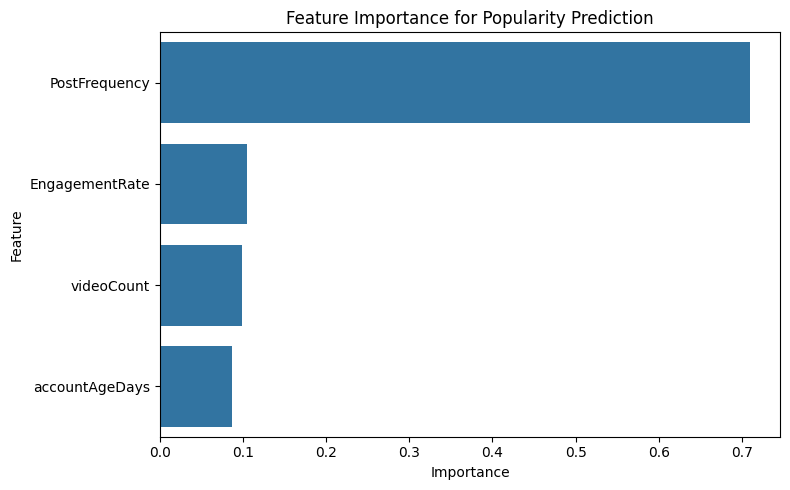

In [29]:
# 6️⃣ Feature Importance
# ==============================
importances = best_gbr.feature_importances_
feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title("Feature Importance for Popularity Prediction")
plt.tight_layout()
plt.show()


🏆 Top 10 Influencers by Predicted Popularity:

                title  subscriberCount  viewCount  PredictedPopularity
2518          MrBeast        37.097942  31.140612             9.803440
585           MrBeast        37.014756  31.073780             7.846944
673    HolaSoyGerman.         3.523886   1.368545             4.353427
2613   HolaSoyGerman.         3.523886   1.368605             4.353427
497        Mark Rober         5.786558   4.445675             3.105391
1068      BB Ki Vines         2.043167   1.459619             3.102123
2433       Mark Rober         5.786558   4.451604             3.021469
1216  Kimberly Loaiza         3.765127   2.098512             2.718520
4195  Kimberly Loaiza         3.765127   2.099076             2.718520
1866  Kimberly Loaiza         3.765127   2.098052             2.648543


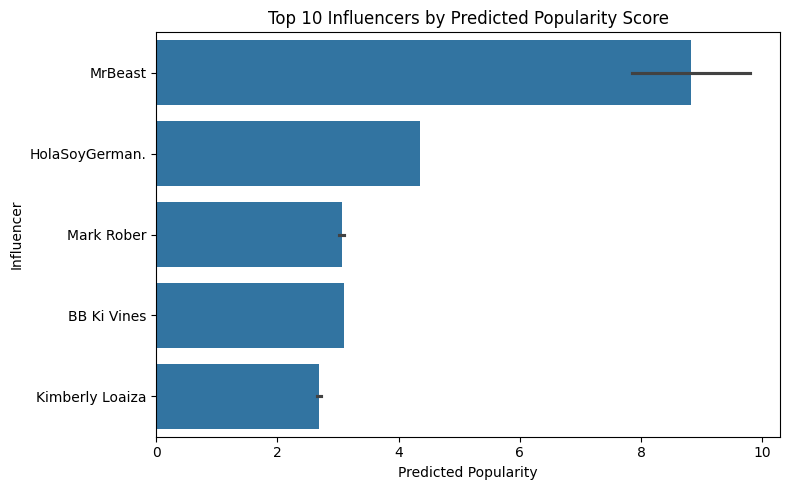

In [30]:
#Predict and Rank Influencers
# ==============================
data['PredictedPopularity'] = best_gbr.predict(X)
top_popular = data.sort_values('PredictedPopularity', ascending=False).head(10)

print("\n🏆 Top 10 Influencers by Predicted Popularity:\n")
print(top_popular[['title', 'subscriberCount', 'viewCount', 'PredictedPopularity']])

plt.figure(figsize=(8,5))
sns.barplot(x='PredictedPopularity', y='title', data=top_popular)
plt.title('Top 10 Influencers by Predicted Popularity Score')
plt.xlabel('Predicted Popularity')
plt.ylabel('Influencer')
plt.tight_layout()
plt.show()

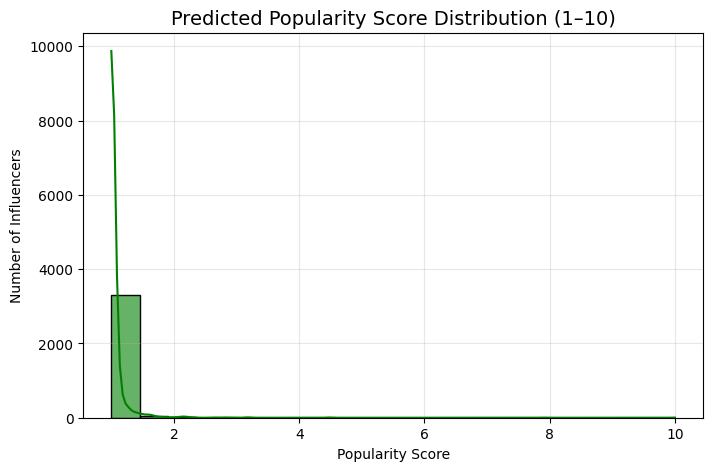

In [31]:
plt.figure(figsize=(8,5))
sns.histplot(data["popularity_score"], bins=20, kde=True, color="green", alpha=0.6)
plt.title("Predicted Popularity Score Distribution (1–10)", fontsize=14)
plt.xlabel("Popularity Score")
plt.ylabel("Number of Influencers")
plt.grid(alpha=0.3)
plt.show()


In [32]:
import pickle

# Save the final tuned model
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_gbr, f)

# Save the scaler (if you used one earlier)
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save feature names
with open("model_features.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)

print("✅ Model, scaler, and features saved successfully!")


✅ Model, scaler, and features saved successfully!
